### <center>Muhammad Rifkyandryan Rustanto</center>
#### <center>F1D022077</center>

# Here you can put your extraordinary code

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2 as cv

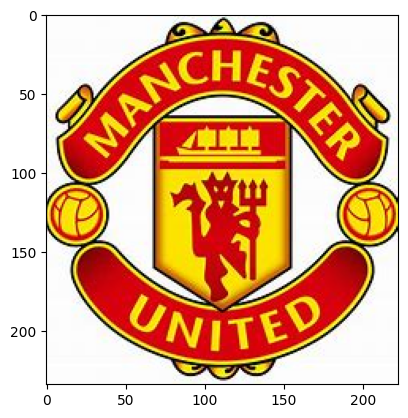

In [2]:
image = img.imread("../assets/manchester_united.jpeg")
plt.imshow(image)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [3]:
kernel_3 = np.full((3,3), 1/9) 


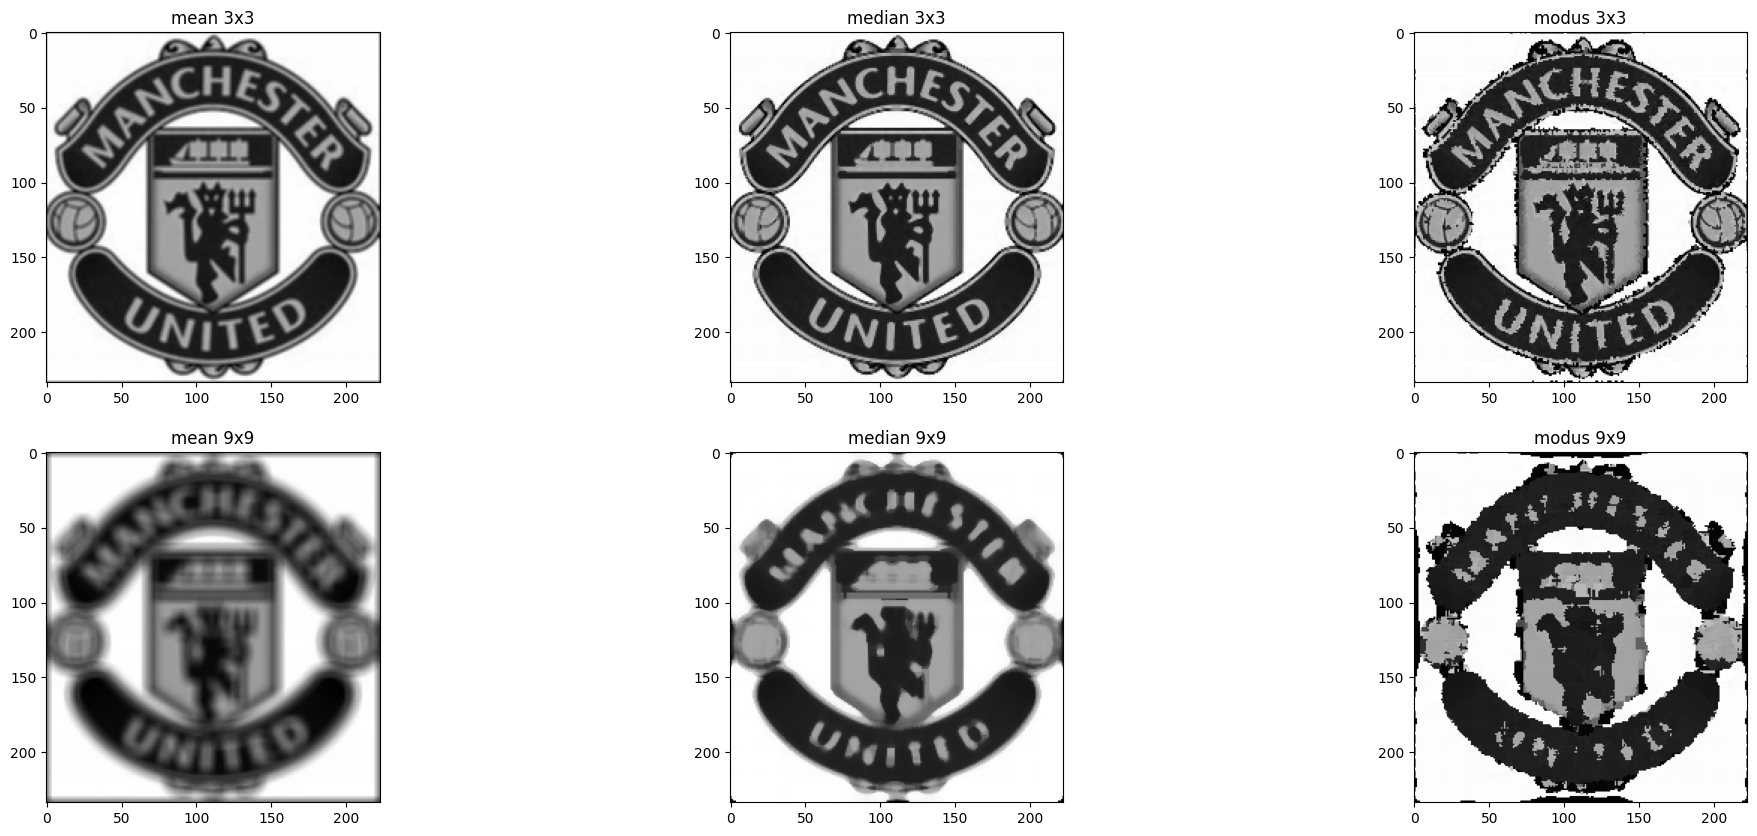

In [4]:
def filter(image, kernel, method):
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape
    result = np.zeros((rows, cols), dtype=np.uint8)
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    for i in range(pad_height, rows + pad_height):
        for j in range(pad_width, cols + pad_width):
            piksel_sekitar = padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1]
            if method == 'mean':
                result[i-pad_height, j-pad_width] = int(np.sum(piksel_sekitar * kernel))
            elif method == 'median':
                result[i-pad_height, j-pad_width] = int(median(piksel_sekitar))
            elif method == 'modus':
                result[i-pad_height, j-pad_width] = int(modus(piksel_sekitar))
    return result

def median(piksel_sekitar):
    flattened = []
    for row in piksel_sekitar:
        for pixel in row:
            flattened.append(pixel)
    flattened.sort()
    length = len(flattened)
    if length % 2 == 0:
        return (flattened[length // 2 - 1] + flattened[length // 2]) // 2
    else:
        return flattened[length // 2]

def modus(piksel_sekitar):
    counts = {}
    for pixel in piksel_sekitar.flatten():
        if pixel in counts:
            counts[pixel] += 1
        else:
            counts[pixel] = 1
    max_count = -1
    mode_val = -1
    for key, val in counts.items():
        if val > max_count:
            max_count = val
            mode_val = key
    return mode_val

kernel_3 = np.full((3, 3), 1/9)
kernel_9 = np.full((9,9), 1/81)

mean_filtered_3 = filter(gray, kernel_3, 'mean')
mean_filtered_9 = filter(gray, kernel_9, 'mean')

median_filtered_3 = filter(gray, kernel_3, 'median')
median_filtered_9 = filter(gray, kernel_9, 'median')

modus_filtered_3 = filter(gray, kernel_3, 'modus')
modus_filtered_9 = filter(gray, kernel_9, 'modus')



fig, axs = plt.subplots(2, 3, figsize=[25, 10])

axs[0, 0].imshow(mean_filtered_3, cmap="gray")
axs[0, 0].set_title('mean 3x3')

axs[1, 0].imshow(mean_filtered_9, cmap="gray")
axs[1, 0].set_title('mean 9x9')

axs[0, 1].imshow(median_filtered_3, cmap="gray")
axs[0, 1].set_title('median 3x3')

axs[1, 1].imshow(median_filtered_9, cmap="gray")
axs[1, 1].set_title('median 9x9')

axs[0, 2].imshow(modus_filtered_3, cmap="gray")
axs[0, 2].set_title('modus 3x3')

axs[1, 2].imshow(modus_filtered_9, cmap="gray")
axs[1, 2].set_title('modus 9x9')

plt.show()
